In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#leitura do arquivo
df = pd.read_csv("dados/consolidado.csv", encoding = "UTF-8", sep = ";", header = 0)

In [3]:
#cabecalho do dataFrame
df.head()

,UF,ESTACAO,LATITUDE,LONGITUDE,ALTITUDE,DATA,DIA,MES,CHUVA_MM,TEMP_MAX,TEMP_MIN,UMI_MAX,UMI_MIN,VENTO_MAX_MS
0,SP,ARIRANHA,"-21,13305554","-48,84055555","525,44",01/01/2021,1,1,0,"28,5","24,1",81,59,"5,3"
1,SP,ARIRANHA,"-21,13305554","-48,84055555","525,44",02/01/2021,2,1,"0,2","28,1","23,2",86,62,"6,7"
2,SP,ARIRANHA,"-21,13305554","-48,84055555","525,44",03/01/2021,3,1,0,"30,7","22,4",87,52,"6,6"
3,SP,ARIRANHA,"-21,13305554","-48,84055555","525,44",04/01/2021,4,1,0,"31,1","20,3",86,46,"11,3"
4,SP,ARIRANHA,"-21,13305554","-48,84055555","525,44",05/01/2021,5,1,0,"30,9","24,2",81,44,"7,3"


In [4]:
#quantidade de linhas de dados
df.shape

(7000, 14)

In [5]:
#leitura das colunas
df.columns.values

array(['UF', 'ESTACAO', 'LATITUDE', 'LONGITUDE', 'ALTITUDE', 'DATA',
       'DIA', 'MES', 'CHUVA_MM', 'TEMP_MAX', 'TEMP_MIN', 'UMI_MAX',
       'UMI_MIN', 'VENTO_MAX_MS'], dtype=object)

In [6]:
#definição das colunas que serão utilizadas
usecols = ['UF', 'ESTACAO', 'LATITUDE', 'LONGITUDE',
       'DIA', 'MES', 'CHUVA_MM', 'TEMP_MAX', 'TEMP_MIN', 'UMI_MAX',
       'UMI_MIN', 'VENTO_MAX_MS']
dfuse = df.filter(items = usecols)
dfuse

,UF,ESTACAO,LATITUDE,LONGITUDE,DIA,MES,CHUVA_MM,TEMP_MAX,TEMP_MIN,UMI_MAX,UMI_MIN,VENTO_MAX_MS
0,SP,ARIRANHA,"-21,13305554","-48,84055555",1,1,0,"28,5","24,1",81,59,"5,3"
1,SP,ARIRANHA,"-21,13305554","-48,84055555",2,1,"0,2","28,1","23,2",86,62,"6,7"
2,SP,ARIRANHA,"-21,13305554","-48,84055555",3,1,0,"30,7","22,4",87,52,"6,6"
3,SP,ARIRANHA,"-21,13305554","-48,84055555",4,1,0,"31,1","20,3",86,46,"11,3"
4,SP,ARIRANHA,"-21,13305554","-48,84055555",5,1,0,"30,9","24,2",81,44,"7,3"
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,SP,VOTUPORANGA,"-20,40333333","-49,96611111",27,8,0,"31,5","18,3",65,29,"11,1"
6996,SP,VOTUPORANGA,"-20,40333333","-49,96611111",28,8,0,"26,4","18,4",69,41,"12,5"
6997,SP,VOTUPORANGA,"-20,40333333","-49,96611111",29,8,0,"28,5","17,3",90,39,"8,2"
6998,SP,VOTUPORANGA,"-20,40333333","-49,96611111",30,8,0,"31,1","16,3",84,27,"8,1"


In [7]:
#quantidade de medições realizadas por estação por mes (estação de coleta de dados climaticos em uma cidade)
estacao = dfuse['ESTACAO']
estacao.value_counts().sort_index()

ARIRANHA                  243
AVARE                      25
BARRA BONITA              242
BARRETOS                  230
BARUERI                   243
BAURU                     243
BERTIOGA                  238
BRAGANCA PAULISTA         243
CAMPOS DO JORDAO          243
DRACENA                    49
FRANCA                    243
IBITINGA                  243
IGUAPE                    185
ITAPEVA                   243
ITUVERAVA                 204
JALES                     243
LINS                       86
MARILIA                   243
PRADOPOLIS                243
PRESIDENTE PRUDENTE       243
RANCHARIA                 243
REGISTRO                  222
SAO CARLOS                243
SAO LUIS DO PARAITINGA    107
SAO MIGUEL ARCANJO        242
SAO PAULO - INTERLAGOS    243
SAO PAULO - MIRANTE       243
SAO SEBASTIAO              22
SAO SIMAO                 242
SOROCABA                  242
TAUBATE                    57
TUPA                      240
VALPARAISO                236
VOTUPORANG

In [8]:
#quantidade de medições realizadas por mes (estação de coleta de dados climaticos em uma cidade)
mes = dfuse['MES']
mes.value_counts().sort_index()

1    1022
2     886
3     923
4     851
5     856
6     820
7     817
8     825
Name: MES, dtype: int64

In [9]:
#maior temperatura registrada por estacao e mes
filt = ['MES','ESTACAO','TEMP_MAX']
maiorTemp = dfuse.filter(items = filt)
maiorTemp = maiorTemp.groupby(['MES','ESTACAO']).max().reset_index()
maiorTemp['TEMP_MAX'] = maiorTemp['TEMP_MAX'].apply(lambda x: float(str(x).replace(',','.')))
#maiorTemp = maiorTemp[maiorTemp.MES == 8].groupby('ESTACAO').max().reset_index()

In [10]:
#menor temperatura registrada por estacao e mes
filt = ['MES','ESTACAO','TEMP_MIN']
menorTemp = dfuse.filter(items = filt)
menorTemp = menorTemp.groupby(['MES','ESTACAO']).min().reset_index()
menorTemp['TEMP_MIN'] = menorTemp['TEMP_MIN'].apply(lambda x: float(str(x).replace(',','.')))
#menorTemp = menorTemp[menorTemp.MES == 8].groupby('ESTACAO').min().reset_index()

In [11]:
#maior temperatura registrada por estacao e mes X menor temperaturapor estacao e mes
#para filtrar por MES retirar o comentario da linha e comentar a linha superior
maiorxmenor = pd.merge(maiorTemp,menorTemp,how='right',left_on=['MES','ESTACAO'],right_on=['MES','ESTACAO'])
maiorxmenor

,MES,ESTACAO,TEMP_MAX,TEMP_MIN
0,1,ARIRANHA,35.3,18.7
1,1,AVARE,31.2,20.7
2,1,BARRA BONITA,34.9,20.4
3,1,BARRETOS,35.5,16.9
4,1,BARUERI,32.7,17.4
...,...,...,...,...
233,8,SAO SIMAO,35.9,10.2
234,8,SOROCABA,33.0,10.2
235,8,TUPA,36.7,10.2
236,8,VALPARAISO,38.8,10.7


In [12]:
#teste = dfuse[dfuse.MES==1]
#teste = teste[teste.ESTACAO=='BARUERI']
#teste['TEMP_MIN'].min()
#teste['TEMP_MAX'].max()

In [13]:
#tabela auxiliar para uso das coordenadas
filt = ['ESTACAO', 'LATITUDE', 'LONGITUDE']
cord = dfuse.filter(items = filt)
cord = cord.groupby(['ESTACAO', 'LATITUDE', 'LONGITUDE']).sum().reset_index()

In [14]:
#maiorxmenor.merge(cord,on='ESTACAO')
gfMaiorxmenor = pd.merge(maiorxmenor,cord,how='left',left_on=['ESTACAO'],right_on=['ESTACAO'])
gfMaiorxmenor['LATITUDE'] = gfMaiorxmenor['LATITUDE'].apply(lambda x: float(str(x).replace(',','.')))
gfMaiorxmenor['LONGITUDE'] = gfMaiorxmenor['LONGITUDE'].apply(lambda x: float(str(x).replace(',','.')))
gfMaiorxmenor

,MES,ESTACAO,TEMP_MAX,TEMP_MIN,LATITUDE,LONGITUDE
0,1,ARIRANHA,35.3,18.7,-21.133056,-48.840556
1,1,AVARE,31.2,20.7,-23.101667,-48.941111
2,1,BARRA BONITA,34.9,20.4,-22.471111,-48.557500
3,1,BARRETOS,35.5,16.9,-20.559167,-48.545000
4,1,BARUERI,32.7,17.4,-23.523889,-46.869444
...,...,...,...,...,...,...
233,8,SAO SIMAO,35.9,10.2,-21.461111,-47.579444
234,8,SOROCABA,33.0,10.2,-23.426111,-47.585556
235,8,TUPA,36.7,10.2,-21.927251,-50.490251
236,8,VALPARAISO,38.8,10.7,-21.319167,-50.930278


Relação de temperatura


<AxesSubplot:title={'center':'Temperatura MINIMA por Estacao de coleta(municipio)'}, xlabel='TEMP_MIN', ylabel='TEMP_MIN'>

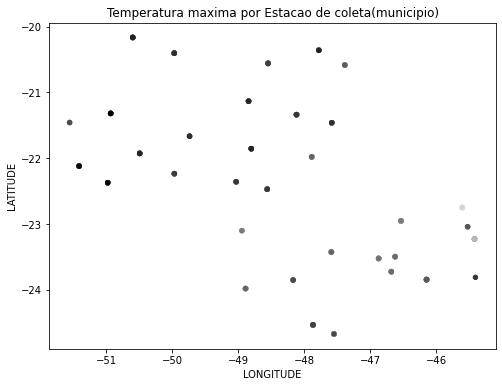

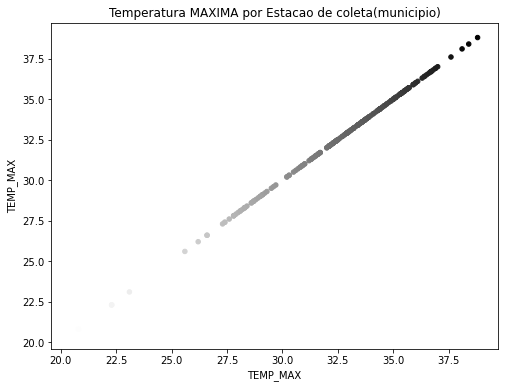

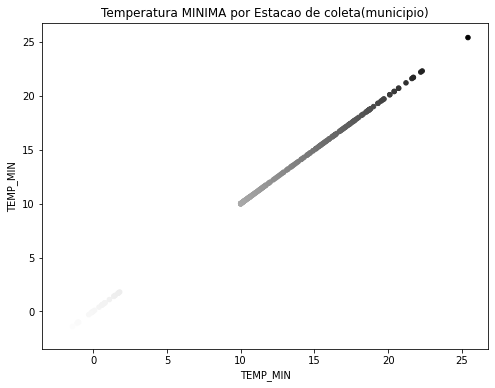

In [15]:
#testes de geração de graficos
print("Relação de temperatura")
gfMaiorxmenor.plot.scatter(y='LATITUDE',x='LONGITUDE',
                           c=gfMaiorxmenor['TEMP_MAX'],
                           #cmap='RdYlGn',
                           figsize=(8,6),
                           title ="Temperatura maxima por Estacao de coleta(municipio)")

gfMaiorxmenor.plot.scatter(y='TEMP_MAX',x='TEMP_MAX',
                           c=gfMaiorxmenor['TEMP_MAX'],
                           #cmap='RdYlGn',
                           figsize=(8,6),
                           title ="Temperatura MAXIMA por Estacao de coleta(municipio)")

gfMaiorxmenor.plot.scatter(y='TEMP_MIN',x='TEMP_MIN',
                           c=gfMaiorxmenor['TEMP_MIN'],
                           #cmap='RdYlGn',
                           figsize=(8,6),
                           title ="Temperatura MINIMA por Estacao de coleta(municipio)")

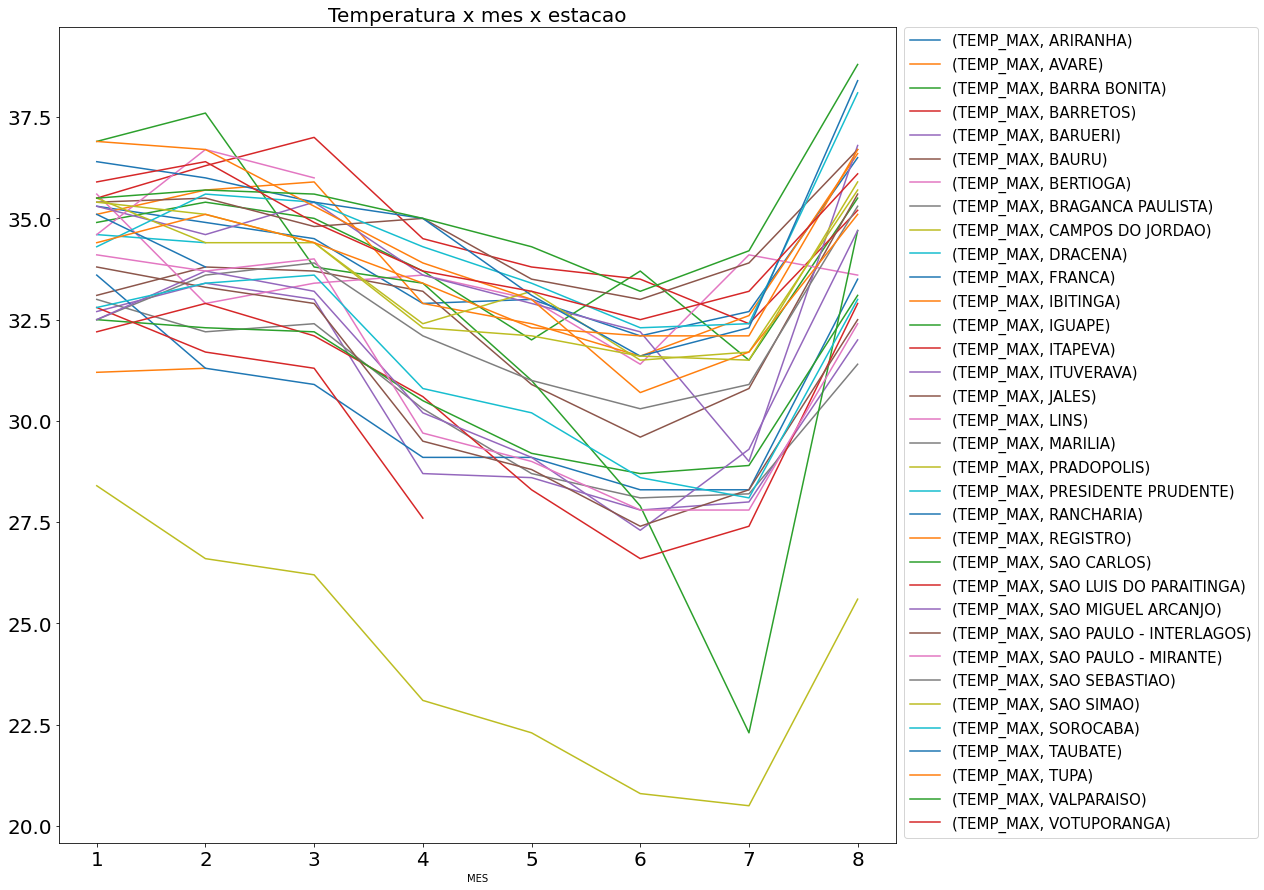

In [26]:
#Temperatura maxima x mes x estacao
#fig, ax = plt.subplots(figsize=(15,15))
#plt.suptitle("Temperatura max x mes x estacao")

ax = maiorxmenor.filter(items=['MES','ESTACAO','TEMP_MAX'])\
.groupby(['MES','ESTACAO'])\
.mean()\
.sort_values(by='TEMP_MAX', ascending=False)\
.unstack()\
.plot(figsize=(15,15), fontsize=20)

ax.set_title('Temperatura x mes x estacao',fontsize=20)
ax.legend(bbox_to_anchor=(1.01, 1), loc=0, borderaxespad=0., fontsize=15)

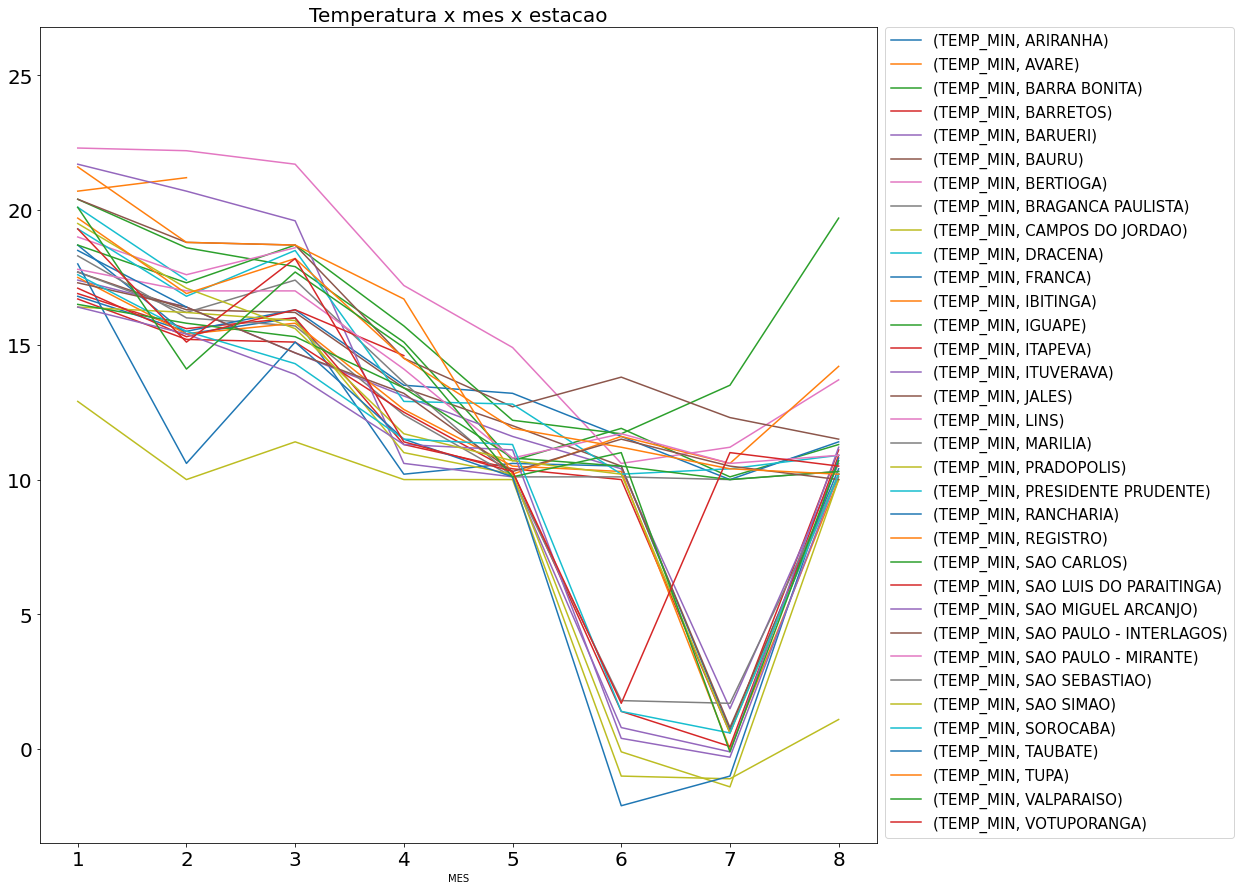

In [27]:
#Temperatura minima x mes x estacao
#fig, ax = plt.subplots(figsize=(5,5))
#plt.suptitle("Temperatura max x mes x estacao")

ax = maiorxmenor.filter(items=['MES','ESTACAO','TEMP_MIN'])\
.groupby(['MES','ESTACAO'])\
.mean()\
.sort_values(by='TEMP_MIN', ascending=False)\
.unstack()\
.plot(figsize=(15,15), fontsize=20)

ax.set_title('Temperatura x mes x estacao',fontsize=20)
ax.legend(bbox_to_anchor=(1.01, 1), loc=0, borderaxespad=0., fontsize=15)

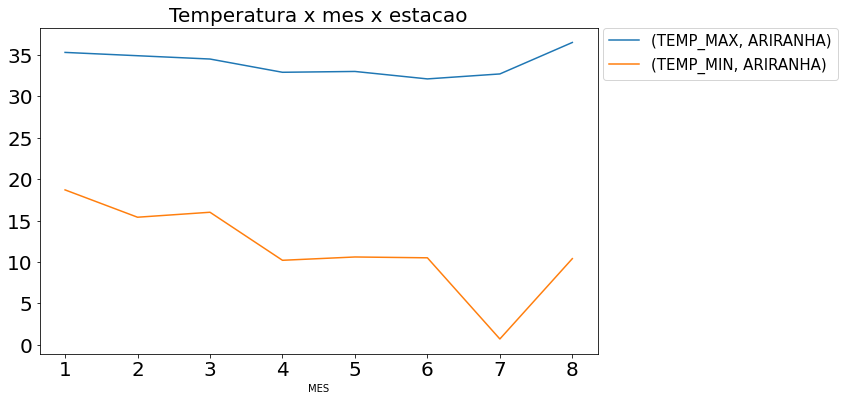

In [31]:
#Temperatura maxima x temperatura minima mes x estacao
#fig, ax = plt.subplots(figsize=(10,6))
#plt.suptitle("Temperatura x mes x estacao")

ax = maiorxmenor.filter(items=['MES','ESTACAO','TEMP_MAX','TEMP_MIN'])\
.where(maiorxmenor.ESTACAO == 'ARIRANHA')\
.groupby(['MES','ESTACAO'])\
.mean()\
.sort_values(by='TEMP_MAX', ascending=False)\
.unstack()\
.plot(figsize=(10,6), fontsize=20)

ax.set_title('Temperatura x mes x estacao',fontsize=20)
ax.legend(bbox_to_anchor=(1.01, 1), loc=0, borderaxespad=0., fontsize=15)